#Predictive Maintenance for Manufacturing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path ='ai4i2020.csv'  
df = pd.read_csv(file_path)

In [3]:
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 10000, Number of columns: 14


In [4]:
print("Preview of the Dataframe:")
df.head()

Preview of the Dataframe:


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [5]:
print("\nDescriptive Statistics for Numerical Features:")
df.describe()


Descriptive Statistics for Numerical Features:


UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [6]:
print("\nDataframe Information:\n")
df.info()


Dataframe Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dty

In [7]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [10]:
df.head(5)

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0  
3         39.5                7                0    0    0    0    0    0  
4         40.0                9                0    0    0    0    0    0

Data conditioning:
Looking for any rows that show inconsistencies. These inconsistencies might be cases where a machine failure is reported without any of the known failure modes being triggered or machine failure is not reported while one of the failures has triggered. If any error is found, we fix the input before any further analysis.

In [11]:
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 10000, Number of columns: 12


In [12]:
condition_1 = (
    (df['Machine failure'] == 1) & 
    (df['TWF'] == 0) & 
    (df['HDF'] == 0) & 
    (df['PWF'] == 0) & 
    (df['OSF'] == 0) & 
    (df['RNF'] == 0)
)

print(f"Found {len(df[condition_1])} instances of 'Machine failure' with no individual modes triggered.")
df = df.drop(df[condition_1].index)



Found 9 instances of 'Machine failure' with no individual modes triggered.


In [13]:
condition_2 = (
    (df['Machine failure'] == 0) & 
    ((df['TWF'] == 1) | 
     (df['HDF'] == 1) | 
     (df['PWF'] == 1) | 
     (df['OSF'] == 1) | 
     (df['RNF'] == 1))
)

print(f"Found {len(df[condition_2])} instances of individual failure modes triggered without 'Machine failure'.")
df = df.drop(df[condition_2].index)

Found 18 instances of individual failure modes triggered without 'Machine failure'.


In [14]:
low, med, high = df['Type'].value_counts()
print(f"Low quality product: {low}\nMedium quality product: {med}\nHigh quality product: {high}")

Low quality product: 5984
Medium quality product: 2991
High quality product: 998


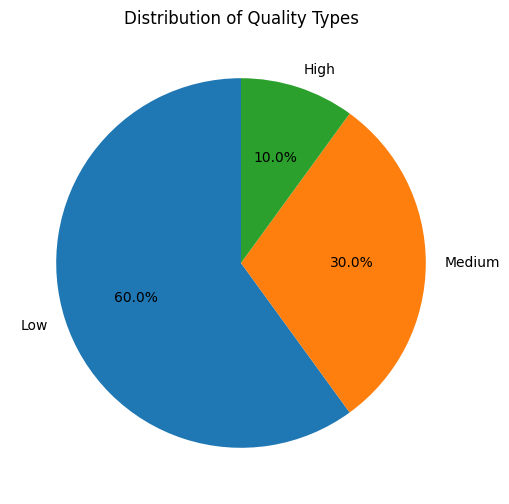

In [15]:
# visualizing Quality Types via pie chart
plt.figure(figsize=(6, 6)) 
plt.title('Distribution of Quality Types') 
plt.pie([low, med, high], labels=['Low', 'Medium', 'High'], autopct='%1.1f%%', startangle=90)
plt.show()

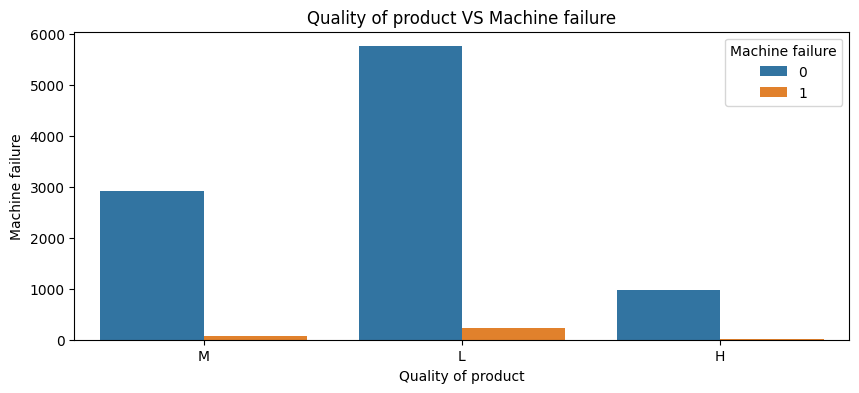

In [16]:
# visualizing Machine failure based on product Quality
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Type', hue='Machine failure')
plt.title('Quality of product VS Machine failure')
plt.xlabel('Quality of product')
plt.ylabel('Machine failure')
plt.show()

Drop the type, as this dominates too strongly on type = L

In [17]:
df = df.drop(['Type'], axis=1)
df.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0  
3         39.5                7                0    0    0    0    0    0  
4         40.0                9                0    0    0    0    0    0

In [18]:
# exploring target variable
zero, one = df['Machine failure'].value_counts()
print(f"Machine failure: {one}\nNo Machine failure: {zero}")

Machine failure: 330
No Machine failure: 9643


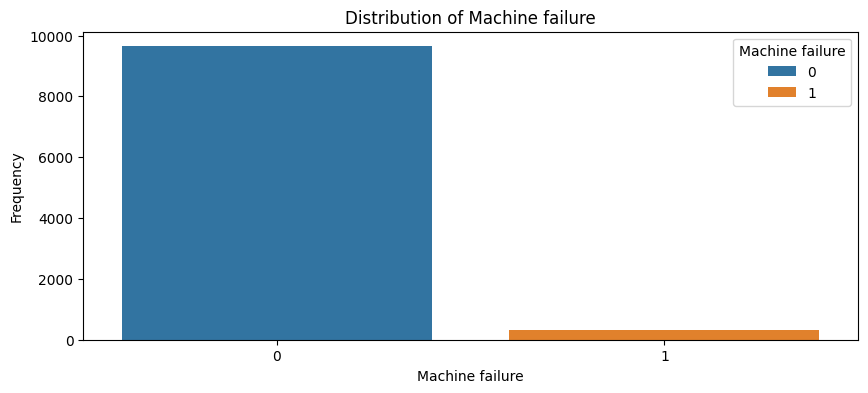

In [19]:
# visualizing target variable(Machine failure)
plt.figure(figsize=(10, 4))
sns.countplot(x='Machine failure', data=df, hue='Machine failure')
plt.title("Distribution of Machine failure")
plt.xlabel("Machine failure")
plt.ylabel("Frequency")
plt.show()

In [20]:
# checking which failure mode is common
twf = df[df.TWF == 1].value_counts().sum() 
hdf = df[df.HDF == 1].value_counts().sum() 
pwf = df[df.PWF == 1].value_counts().sum() 
osf = df[df.OSF == 1].value_counts().sum() 
rnf = df[df.RNF == 1].value_counts().sum()
print(f"TWF: {twf}\nHDF: {hdf}\nPWF: {pwf}\nOSF: {osf}\nRNF: {rnf}")

TWF: 46
HDF: 115
PWF: 95
OSF: 98
RNF: 1


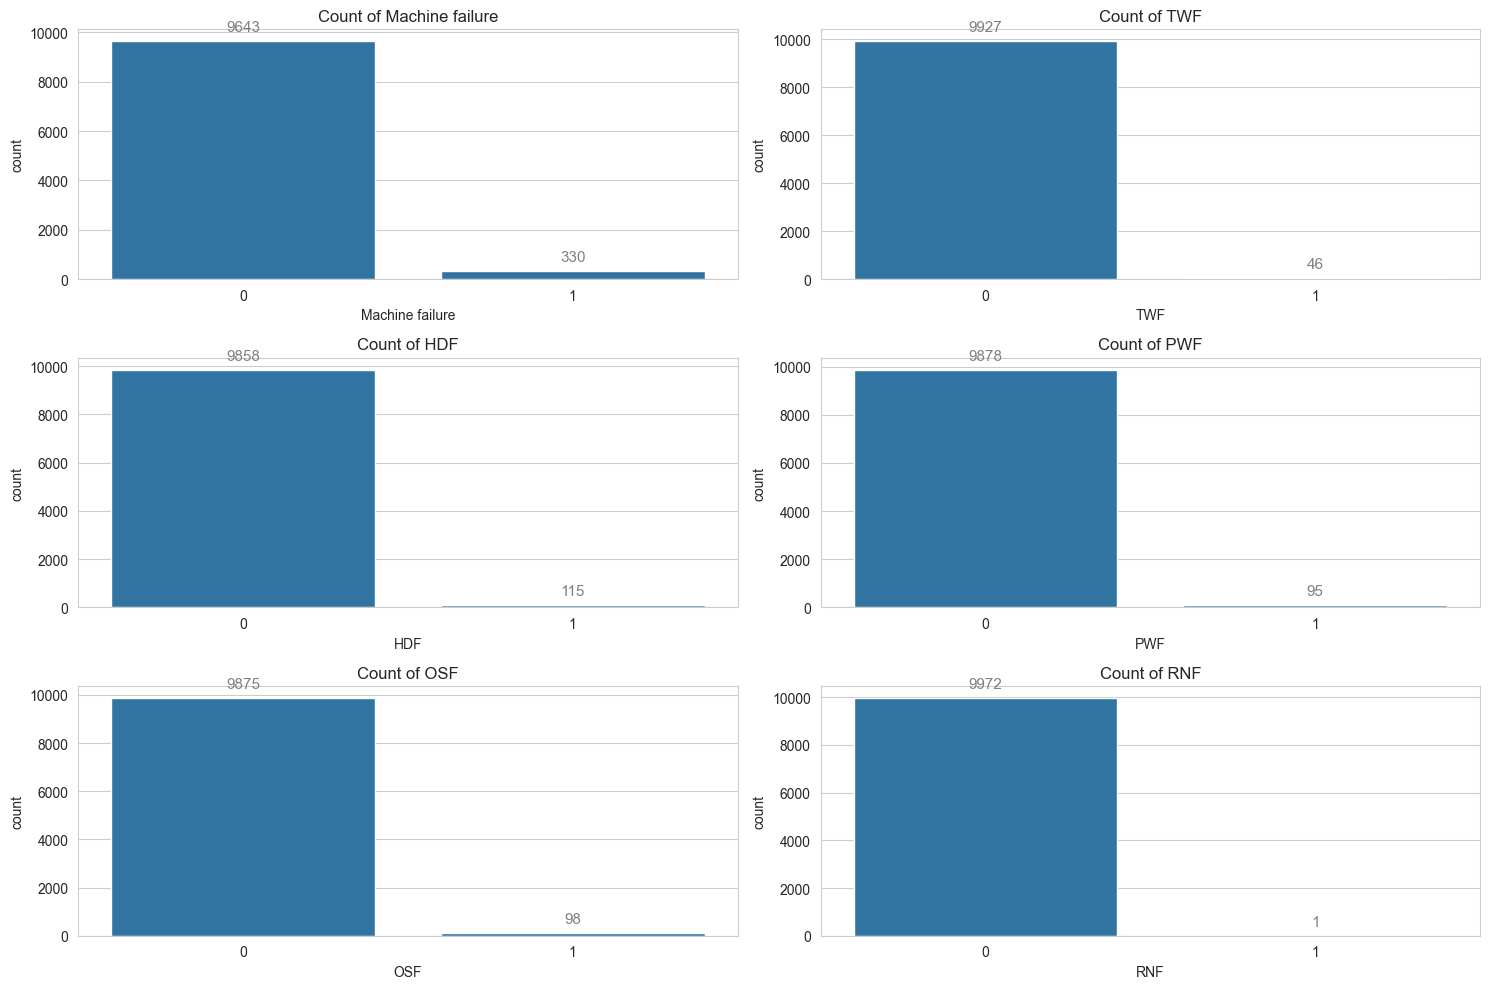

In [21]:
sns.set_style("whitegrid")

failure_modes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Plotting the bar charts for each failure mode
plt.figure(figsize=(15, 10))
for i, mode in enumerate(failure_modes, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(x=mode, data=df)
    ax.set_title(f'Count of {mode}')
    # Annotate the count above the bars for better readability
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

Plot the distribution for each attribute, We can see that the data is imbalanced (Type, Machine failure, TWF, HDF, PWF, OSF, RNF)

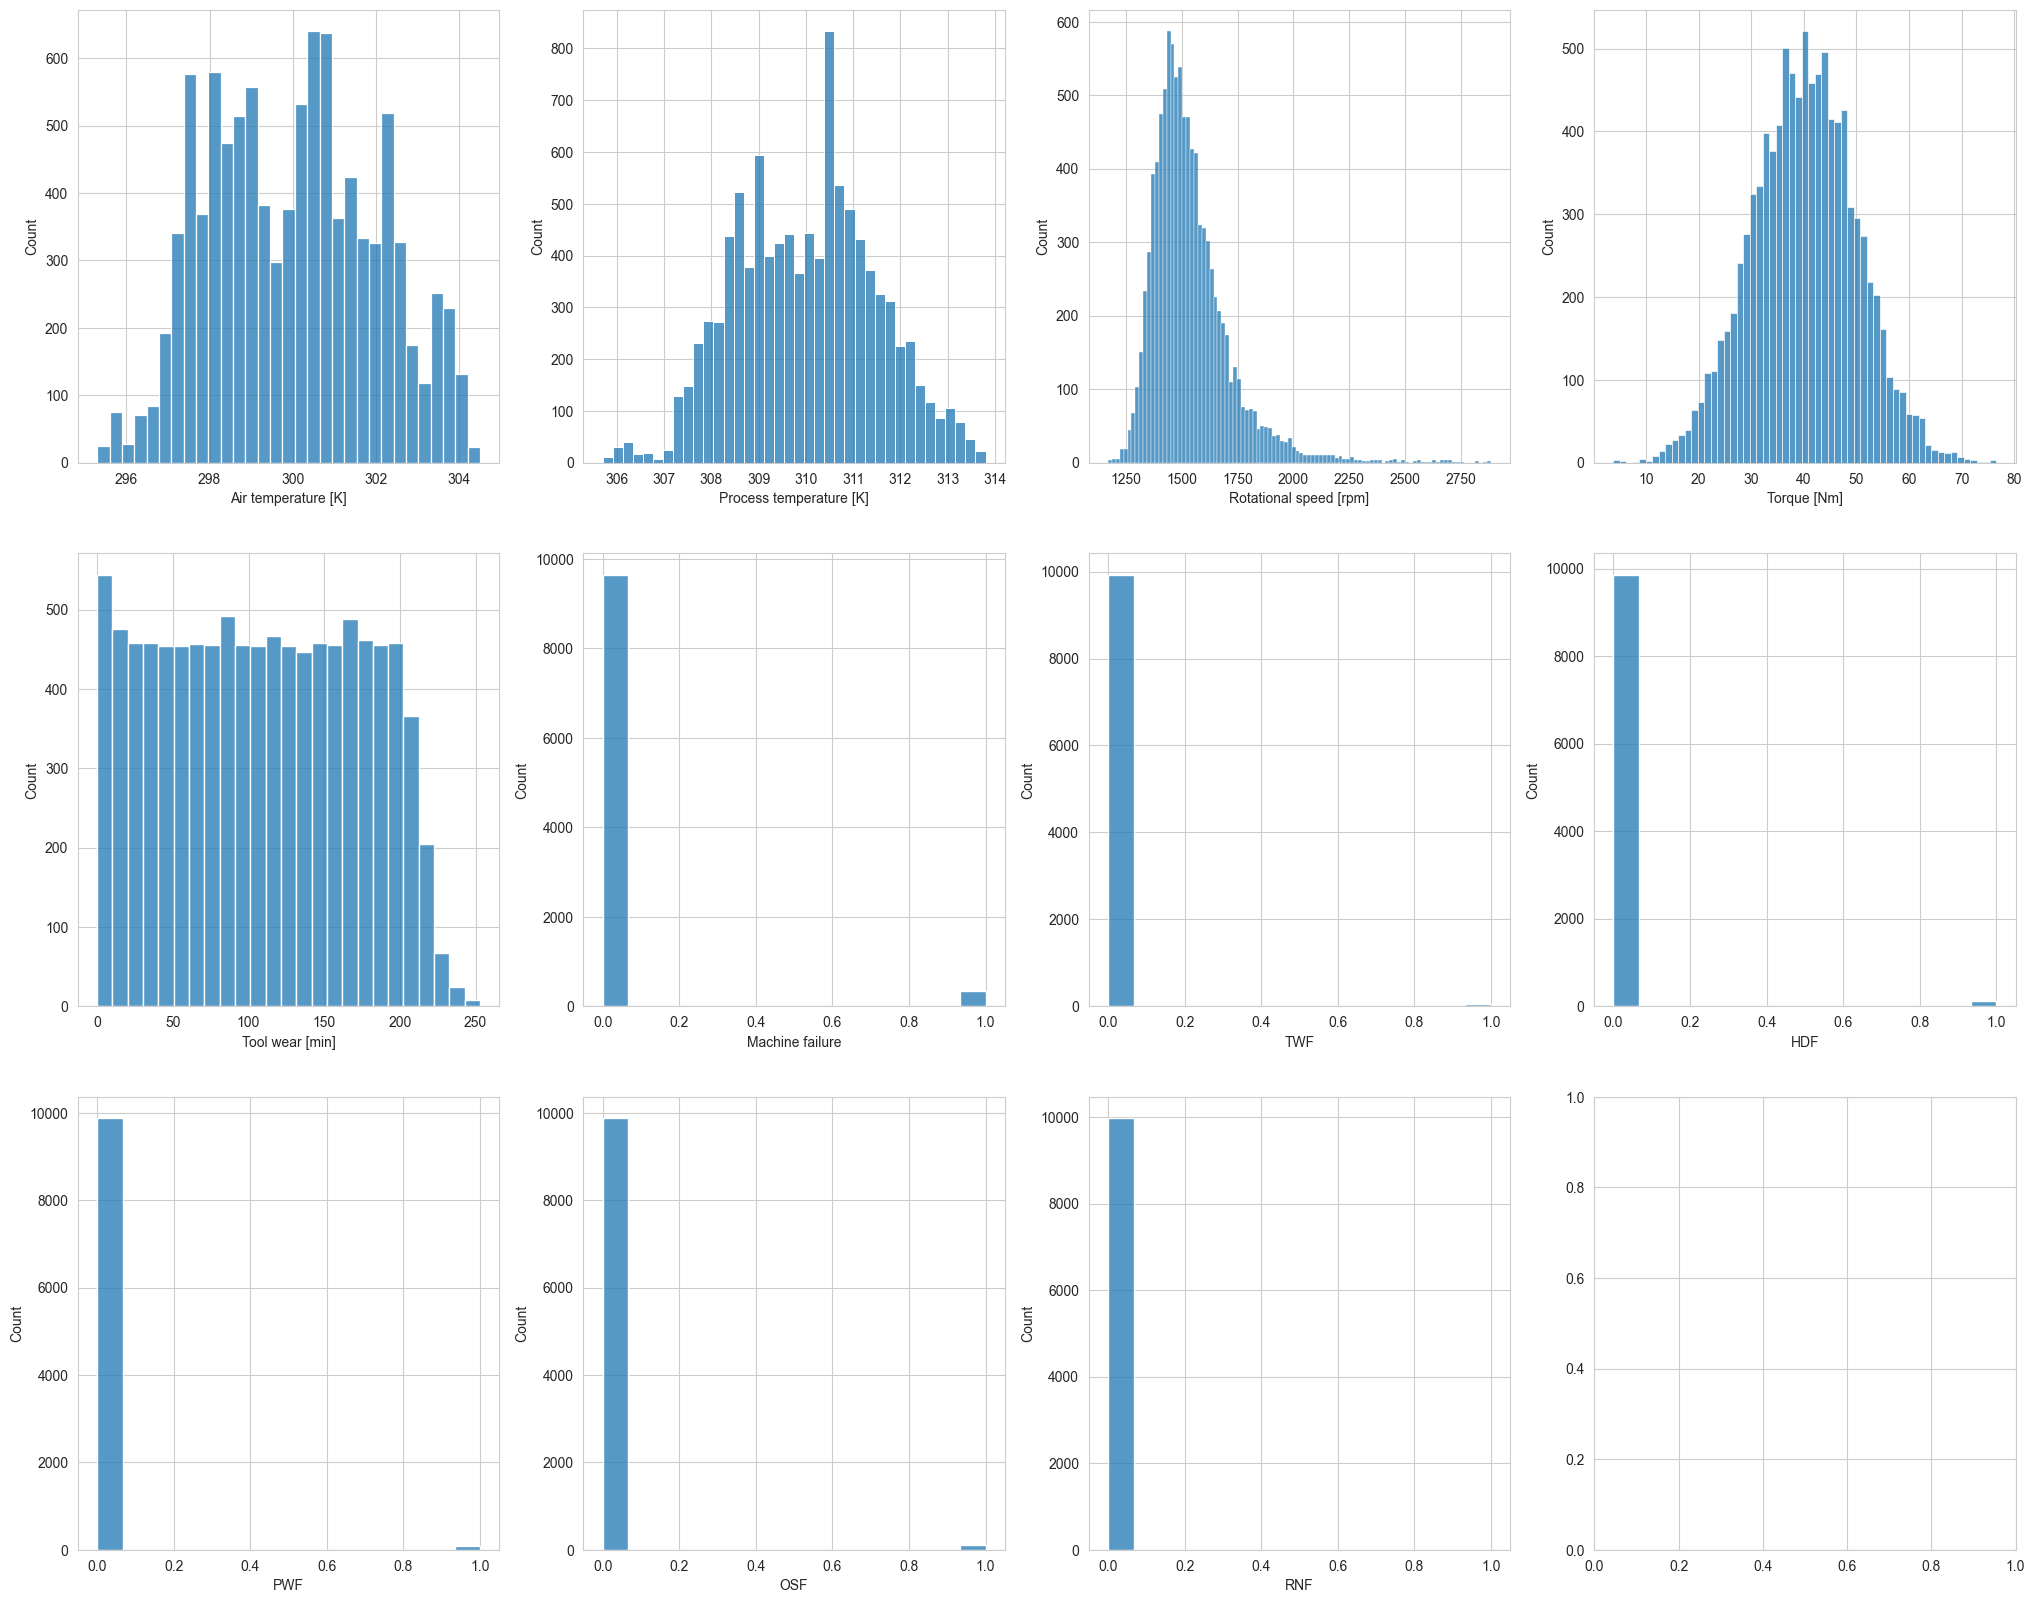

In [22]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

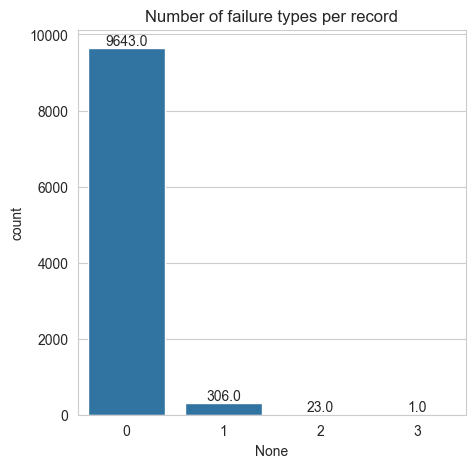

In [23]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
rows_sum = df_failures.sum(axis=1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

As shown above, 24 records contain more than one type of failure, but their count is very small compared to the entire data set, so we will combine the failure types into one feature.The individual failure types are then dropped. 
No failure = 0, TWF = HDF = PWF = OSF = RNF = 1

In [24]:
df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [25]:
df.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  
0         42.8                0                0  
1         46.3                3                0  
2         49.4                5                0  
3         39.5                7                0  
4         40.0                9                0

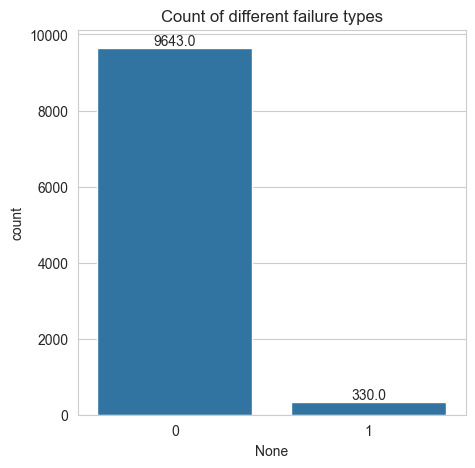

In [26]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

Correlation Heatmap :
To further our analysis, we generate a heatmap of correlations among the numerical features. This heatmap helps us identify highly correlated features which may impact the predictability of machine failures. We apply a threshold to focus on correlations stronger than 0.80, highlighting significant relationships while filtering out less relevant ones.

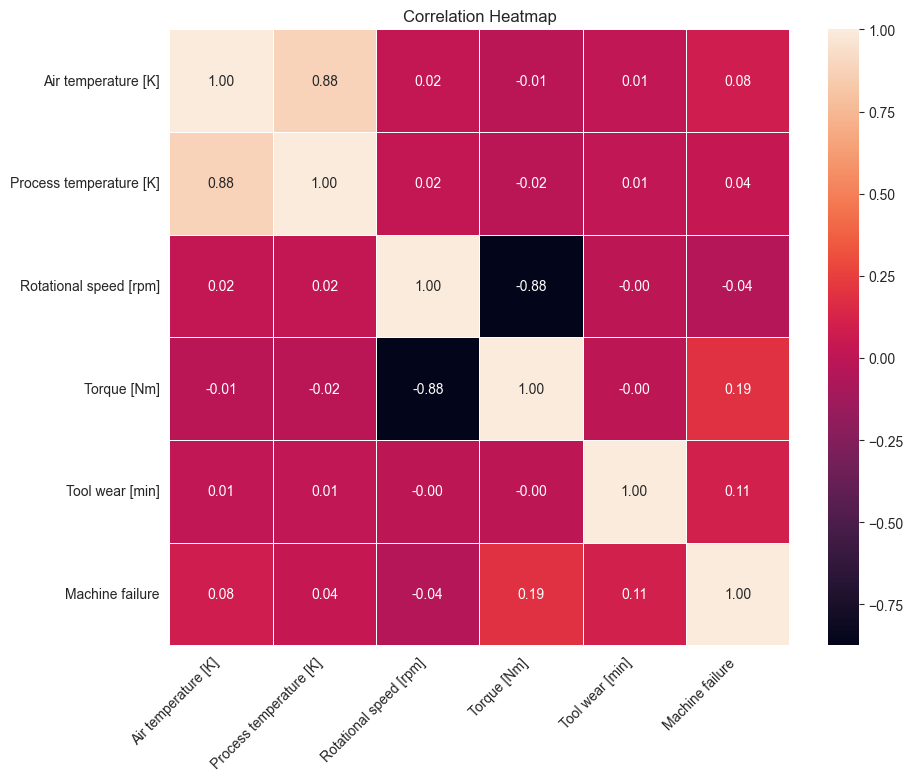

In [27]:
# determining the correlation between the other features and Machine failure via Heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']]
correlation_matrix = heatmap_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()

Strong Correlations :
Features that display strong correlations (above the 0.80 threshold) are particularly interesting as they might indicate redundancies or strong dependencies between operational parameters. The heatmap is color-coded from red (high positive correlation) to blue (high negative correlation), with annotations indicating the exact correlation values.

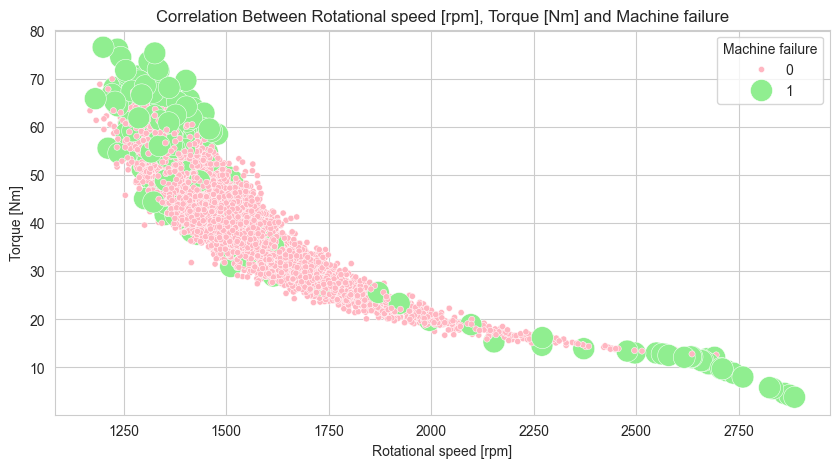

In [28]:
# determining the correlation between the Rotational speed [rpm], Torque [Nm] and Machine failure
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', palette=['lightpink', 'lightgreen'], data=df, size='Machine failure', sizes=(250, 20))
plt.title('Correlation Between Rotational speed [rpm], Torque [Nm] and Machine failure')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()

From the above graph, we can Analyze : Most Machine failure occurs When Torque [Nm] value is high and Rotational speed [rpm] is also high

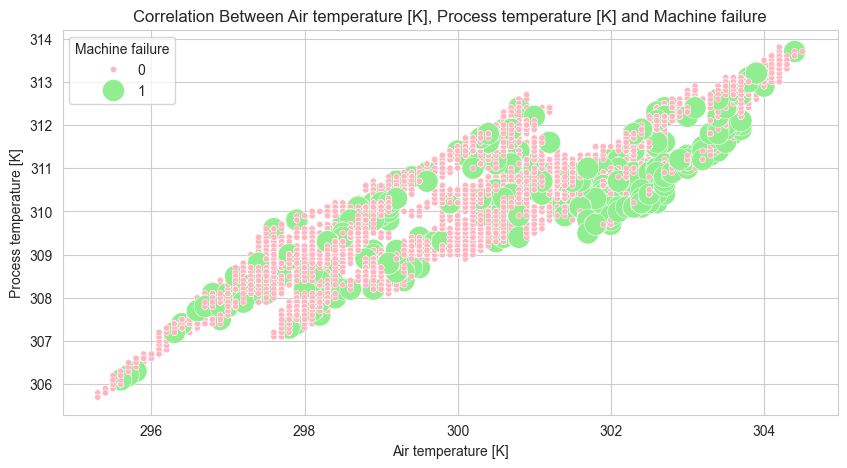

In [29]:
# determining the correlation between the Air temperature [K], Process temperature [K] and Machine failure
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', hue='Machine failure', palette=['lightpink', 'lightgreen'], data=df, size='Machine failure', sizes=(250, 20))
plt.title('Correlation Between Air temperature [K], Process temperature [K] and Machine failure')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.show()

Feature engineering 
Before further EDA, in this section, we engineer new features that could help in predicting machine failures more accurately. These features are derived from the existing data and are based on domain knowledge and hypotheses about what conditions might lead to machine failure. For example, the temperature difference could be an indicator of abnormal machine behavior, and the power is a product of torque and rotational speed which could affect the machine's operational efficiency.

We will create two new features that are expected to provide valuable insights into machine operations:

Power: This feature is a product of the torque and rotational speed. It represents the total mechanical power exerted by the machine, which may be a critical factor in predicting machine failures.
Temperature_difference: This feature represents the difference between the process temperature and air temperature. A significant difference might indicate abnormal operating conditions.

In [30]:
#Adding new columns to the  df based on the information of data descrption, these features directly affect the failures
df['Power [W]'] = df[['Rotational speed [rpm]', 'Torque [Nm]']].product(axis=1)
df['Temperature difference [k]']= df['Process temperature [K]'] - df['Air temperature [K]']

In [31]:
df.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  Power [W]  \
0         42.8                0                0    66382.8   
1         46.3                3                0    65190.4   
2         49.4                5                0    74001.2   
3         39.5                7                0    56603.5   
4         40.0                9                0    56320.0   

   Temperature difference [k]  
0                        10.5  
1                        10.5  
2                        10.4  
3                        10.4  
4                        10.5

<Axes: xlabel='Temperature difference [k]', ylabel='Count'>

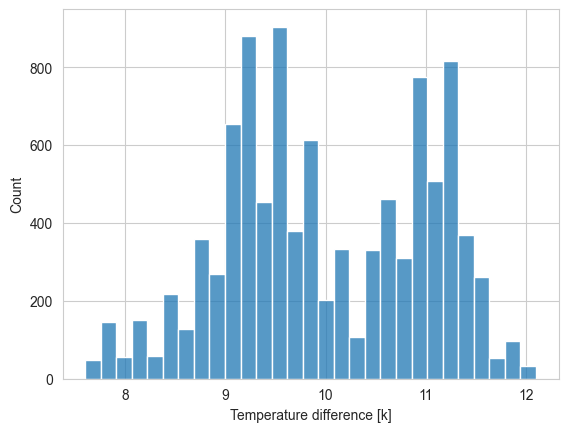

In [32]:
sns.histplot(df['Temperature difference [k]'])

<Axes: xlabel='Power [W]', ylabel='Count'>

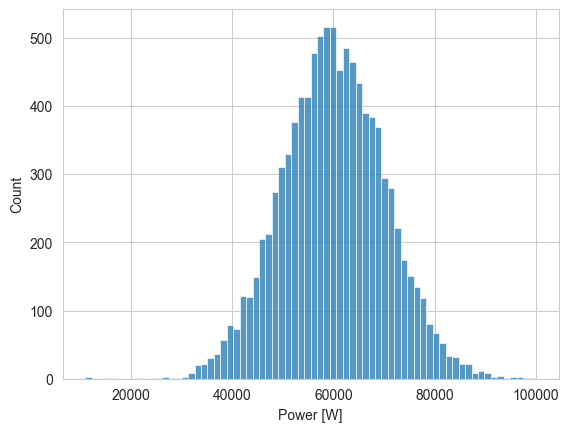

In [33]:
sns.histplot(df['Power [W]'])

replace the missing numeric values with the mean

In [34]:
df_numeric = df.select_dtypes(include=[np.number])
features = list(df.columns)

In [35]:
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df[feature].fillna(df[feature].mean(),inplace=True)
    except:
        try:
            df[feature].fillna(df[feature].mode(),inplace=True)
        except:
            pass

C:\Users\hp\AppData\Local\Temp\ipykernel_1508\1318130641.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mean(),inplace=True)


In [100]:
for column in df.columns:
    df[column] = df[column].astype(float)

In [101]:
df.dtypes

Air temperature [K]           float64
Process temperature [K]       float64
Rotational speed [rpm]        float64
Torque [Nm]                   float64
Tool wear [min]               float64
Machine failure               float64
Power [W]                     float64
Temperature difference [k]    float64
dtype: object

Handling outliers: Density-Based Anomaly Detection (LOF)

In [102]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(n_neighbors=5)

# use the model to predict the outlier scores for each row
scores = model.fit_predict(df)

# identify the outlier rows (those with a negative score) and remove them
outliers = df[scores == -1]
if not outliers.empty:
    df.drop(outliers.index, inplace=True)

In [103]:
df.shape

(9841, 8)

Automated EDA

In [59]:
import pandas as pd
from  ydata_profiling import ProfileReport

# Create the profile report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# To display the report in a Jupyter notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Feature Selection  In this section, we use two different techniques to refine our feature set: univariate feature selection and backward stepwise regression. These methods help to reduce overfitting, improve model performance, and decrease computational complexity

Univariate Feature Selection
We use the SelectKBest method with the chi2 statistic to perform univariate feature selection. This technique evaluates each feature individually to determine its strength of association with the response variable. Here, we select the best features based on the chi-squared test, which is particularly useful for categorical features.

The scores from this selection are visualized to show the importance of each feature. The features with higher scores are considered more relevant for predicting machine failure.

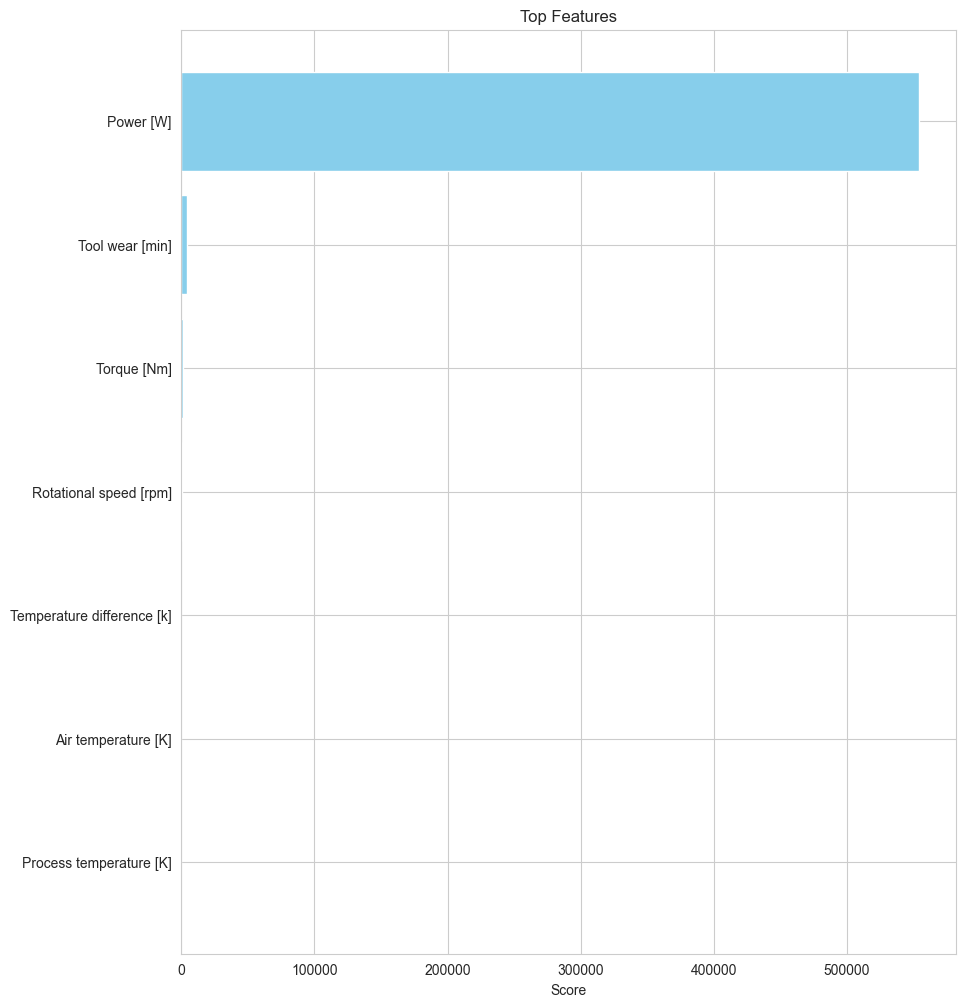

In [104]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import pandas as pd

# Sélectionner les meilleures caractéristiques
best_features = SelectKBest(score_func=chi2, k='all')

y = df['Machine failure'] 
X = df.drop(columns=['Machine failure'])

fit = best_features.fit(X, y)

# Créer un DataFrame avec les scores des caractéristiques
df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(X.columns)
feature_score = pd.concat([df_col, df_scores], axis=1)
feature_score.columns = ['feature', 'score']

# Trier les caractéristiques par score décroissant (plus importantes en premier)
feature_score.sort_values(by=['score'], ascending=False, inplace=True)

# Visualiser les caractéristiques les plus importantes
plt.figure(figsize=(10, 12))
plt.barh(feature_score['feature'][0:21], feature_score['score'][0:21], color='skyblue')
plt.xlabel('Score')
plt.title('Top Features')
plt.gca().invert_yaxis()  # Inverser l'ordre des caractéristiques pour les plus importantes en haut
plt.show()


Backward Stepwise Regression
After univariate selection, we apply backward stepwise regression. This method starts with all candidate features and iteratively removes the least significant feature (highest p-value) until all remaining features have a significant relationship with the target variable at the specified p-value threshold. This approach is based on p-values from OLS regression models and is effective in refining the feature set to include only those with strong statistical significance.

In [105]:
import statsmodels.api as sm

Selected_Features = []

def backward_regression(X, y, initial_list=[], threshold_out=0.5, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")

# Application of the backward regression function on our training data
backward_regression(X, y)


Selected Features:
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Power [W]', 'Temperature difference [k]']


In [106]:
feature_names = list(X.columns)
np.shape(X)

(9841, 7)

Modeling:
With the feature selection completed, we proceed to train and evaluate a machine learning model. The primary goal is to predict machine failures accurately using the features identified as most predictive.

Data Scaling :
Data scaling is performed to normalize feature values so that no single feature dominates the model due to its scale. We use MinMaxScaler to transform each feature.

Model Training :
For the classification task, a RandomForestClassifier is used. This model is well-suited for handling complex datasets with interactions between features. It is trained using the scaled training data. I've tried XGBoostClassifier before, but I got better results with the current model.

Threshold Adjustment :
The prediction threshold was adjusted to optimize the balance between false positives and false negatives. This is particularly important in predictive maintenance, where the costs of false negatives might be high.

In [107]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision','Recall', 'F1-Score', 'Training time','Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')
    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,end_train-start, end_predict-end_train]


In [108]:
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'Power [W]', 'Temperature difference [k]'],
      dtype='object')

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,  random_state = 0,stratify = y)

(array([6665.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         223.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

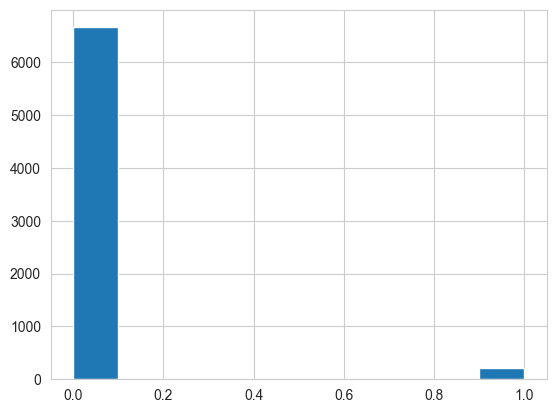

In [110]:
plt.hist(y_train)

Because the data is imbalanced, we oversample the training set

In [111]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#oversample = RandomOverSampler(random_state=42)
#X_train, y_train = oversample.fit_resample(X_train, y_train)

(array([6665.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6665.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

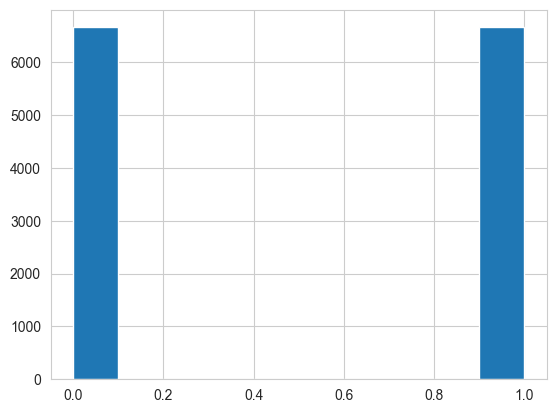

In [112]:
plt.hist(y_train)

In [113]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [114]:
print(X_train.shape)
print(y_train.shape)

(13330, 7)
(13330,)


In [115]:
print(X_test.shape)
print(y_test.shape)

(2953, 7)
(2953,)


Decision Tree Model

In [116]:
from sklearn.tree import DecisionTreeClassifier
import time

start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) 
end_predict = time.time()

log_scores("Decision Tree", y_test, y_predictions)

In [117]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2857
         1.0       0.47      0.77      0.58        96

    accuracy                           0.96      2953
   macro avg       0.73      0.87      0.78      2953
weighted avg       0.98      0.96      0.97      2953



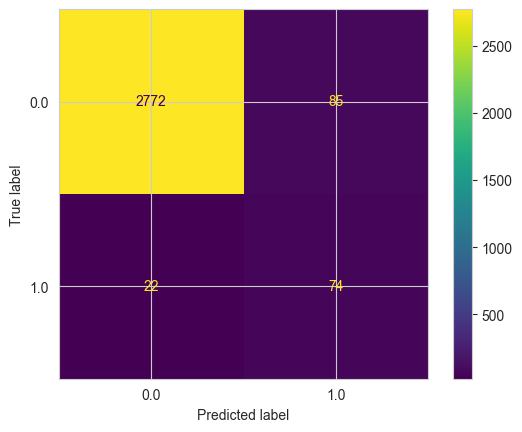

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions)  

k-NN (K-nearest neighbors) Model

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(2, 20)}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'n_neighbors': 2}


In [120]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

log_scores("k-NN", y_test, y_predictions)

In [121]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      2857
         1.0       0.41      0.74      0.53        96

    accuracy                           0.96      2953
   macro avg       0.70      0.85      0.75      2953
weighted avg       0.97      0.96      0.96      2953



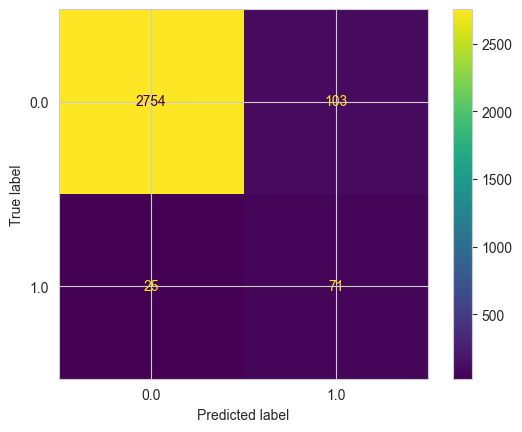

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions)  

Random Forest Model

In [123]:
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()
# Ajouter class_weight='balanced' ici
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
end_train = time.time()

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
end_predict = time.time()

threshold = 0.3
y_pred_new = (y_pred_proba >= threshold).astype(int)

# Évaluer le modèle
log_scores("Random Forest", y_test, y_pred_new)


In [124]:
print("Random Forest Model\n" + classification_report(y_test, y_pred_new))

Random Forest Model
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2857
         1.0       0.36      0.92      0.51        96

    accuracy                           0.94      2953
   macro avg       0.68      0.93      0.74      2953
weighted avg       0.98      0.94      0.96      2953



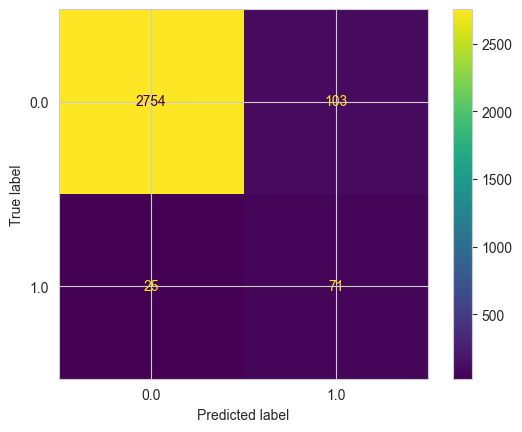

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions) 

Gradient Boosting Model

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

log_scores("Gradient Boosting", y_test, y_predictions)

In [127]:
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2857
         1.0       0.35      0.92      0.51        96

    accuracy                           0.94      2953
   macro avg       0.68      0.93      0.74      2953
weighted avg       0.98      0.94      0.95      2953



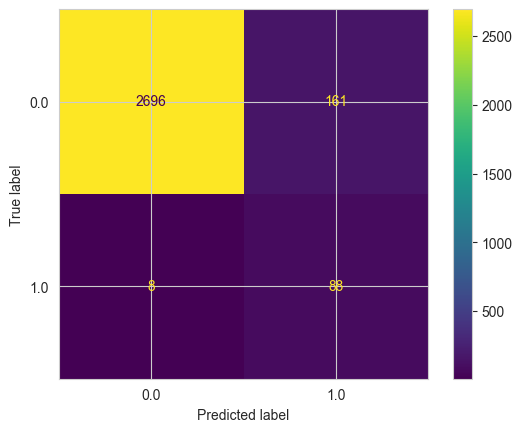

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions) 

Gaussian Naive Bayes Model

In [129]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

log_scores("Gaussian Naive Bayes", y_test, y_predictions)

In [130]:
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      2857
         1.0       0.15      0.81      0.25        96

    accuracy                           0.84      2953
   macro avg       0.57      0.83      0.58      2953
weighted avg       0.97      0.84      0.89      2953



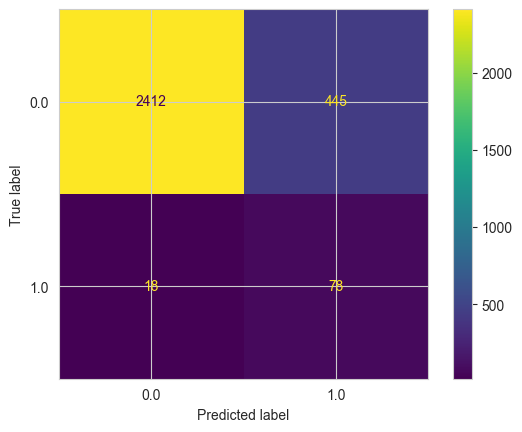

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions) 

Evaluation

In [139]:
model_performance

Accuracy  Precision    Recall  F1-Score  Training time  \
Decision Tree         0.963766   0.975003  0.963766  0.968040       0.219377   
k-NN                  0.956654   0.972052  0.956654  0.962615       0.078789   
Random Forest         0.943447   0.976213  0.943447  0.955128       3.205906   
Gradient Boosting     0.942770   0.976118  0.942770  0.954673       4.582557   
Gaussian Naive Bayes  0.843210   0.965173  0.843210  0.890957       0.006980   

                      Prediction time  
Decision Tree                0.002012  
k-NN                         0.349065  
Random Forest                0.073799  
Gradient Boosting            0.006981  
Gaussian Naive Bayes         0.001000

In [157]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': None, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [146]:
import pickle

model = RandomForestClassifier(class_weight='balanced',random_state=42).fit(X_train, y_train)

pickle.dump(model, open('finalized_model2.pkl', 'wb'))


In [148]:
import pickle
import numpy as np
import pandas as pd

# Load the saved model
with open('finalized_model2.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Define the test sample
test_sample = np.array([[298.1, 308.6, 1551, 42.8, 0, 66382.8, 10.5]])

# Define column names
columns = [
    'Air temperature [K]', 
    'Process temperature [K]', 
    'Rotational speed [rpm]', 
    'Torque [Nm]', 
    'Tool wear [min]', 
    'Power [W]', 
    'Temperature difference [k]'
]

# Convert the test sample to a DataFrame
test_sample_df = pd.DataFrame(test_sample)

# Ensure the test sample DataFrame matches the features used for training
# Perform prediction
prediction = loaded_model.predict(test_sample_df)

# Define prediction labels
prediction_labels = {0: "Not Failure", 1: "Failure"}

# Print the prediction
print(f"Prediction for the test sample: {prediction_labels[prediction[0]]}")



Prediction for the test sample: Failure
